In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<Axes: >

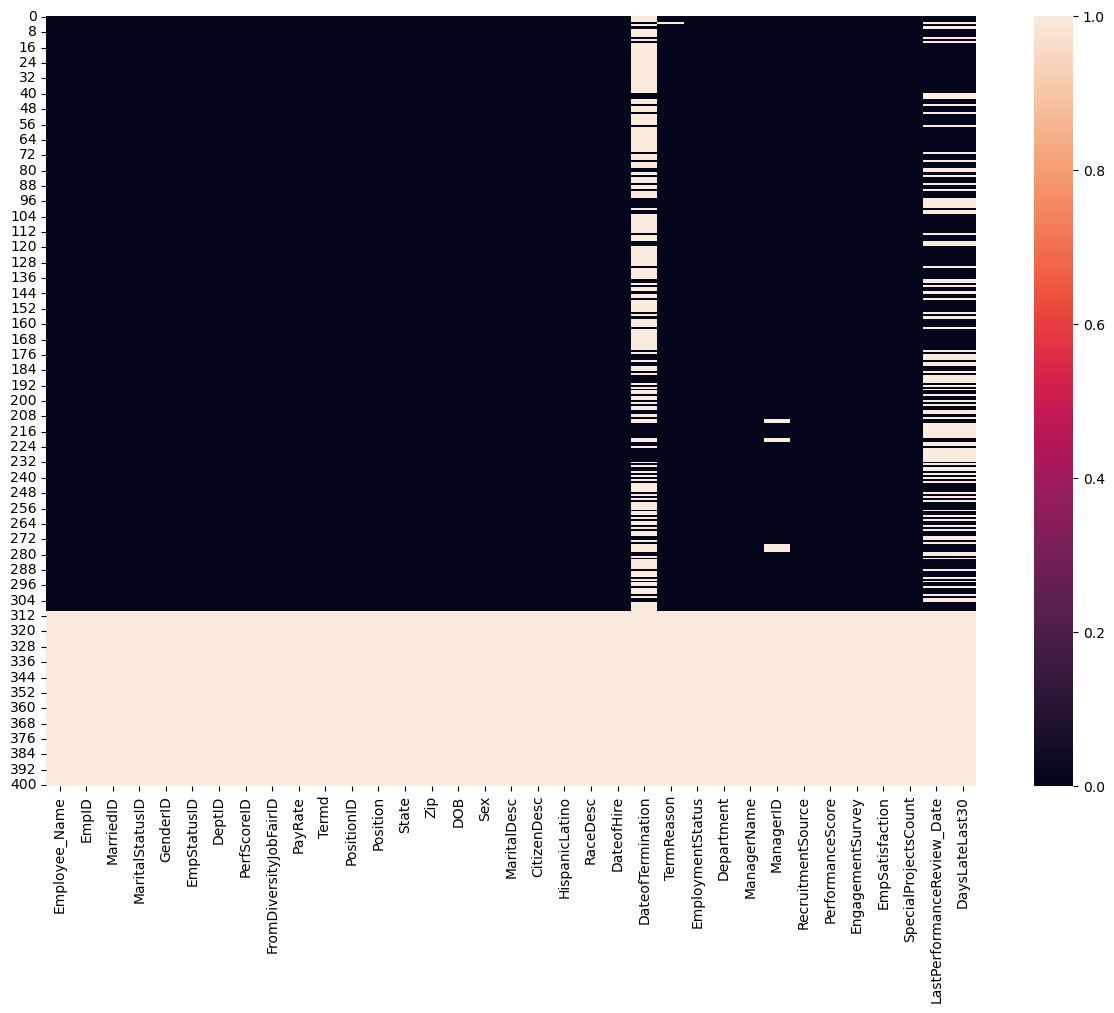

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [5]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

<Axes: >

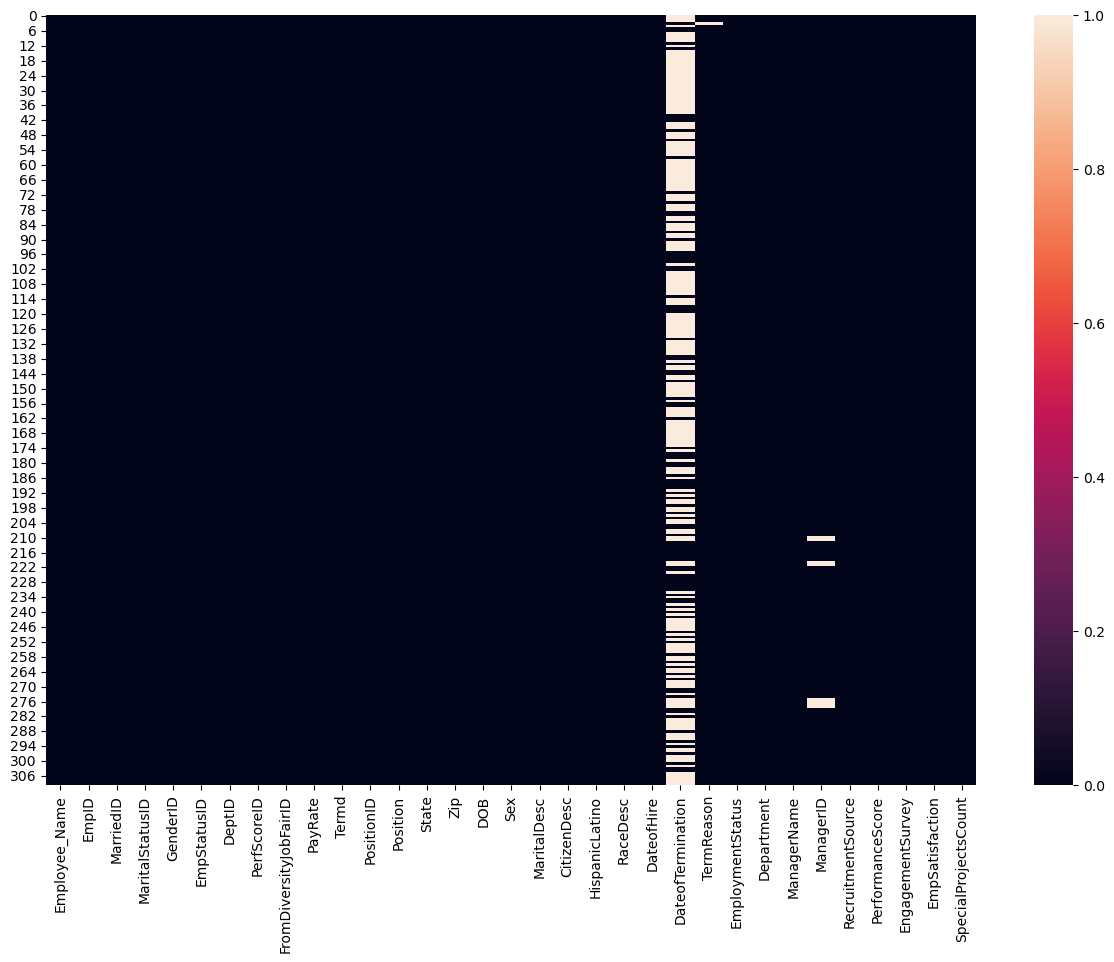

In [7]:
df.dropna(thresh=2,inplace=True)

plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [9]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [11]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [13]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [19]:
df[['DateofTermination','DOB','DateofHire']].head(25)

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
5,2013-09-25,1987-06-14,2011-09-26
6,2014-08-02,2064-06-01,2011-08-15
7,NaT,2063-05-15,2014-08-18
8,NaT,1987-05-14,2012-02-20
9,NaT,1988-09-14,2014-08-18


In [21]:
# Korygowanie lat przyszłości
df['DOB'] = df['DOB'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2019 else x)

In [23]:
df[['DateofTermination','DOB','DateofHire']].head(25)

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
5,2013-09-25,1987-06-14,2011-09-26
6,2014-08-02,1964-06-01,2011-08-15
7,NaT,1963-05-15,2014-08-18
8,NaT,1987-05-14,2012-02-20
9,NaT,1988-09-14,2014-08-18


In [25]:
sns.set_style('darkgrid')

In [27]:
missing_manager_id = df[df['ManagerID'].isna()]['ManagerName'].value_counts()
missing_manager_id

ManagerName
Webster Butler    8
Name: count, dtype: int64

In [31]:
df[df['ManagerName'] == 'Webster Butler'][['ManagerName', 'ManagerID']].drop_duplicates()

,ManagerName,ManagerID
209,Webster Butler,39.0
210,Webster Butler,NaN


In [33]:
# Uzupełnianie brakujących ID dla Webstera Butlera
df.loc[(df['ManagerName'] == 'Webster Butler') & (df['ManagerID'].isna()), 'ManagerID'] = 39.0

In [37]:
df[df['ManagerName'] == 'Webster Butler'][['ManagerName', 'ManagerID']].drop_duplicates()

,ManagerName,ManagerID
209,Webster Butler,39.0


<Axes: >

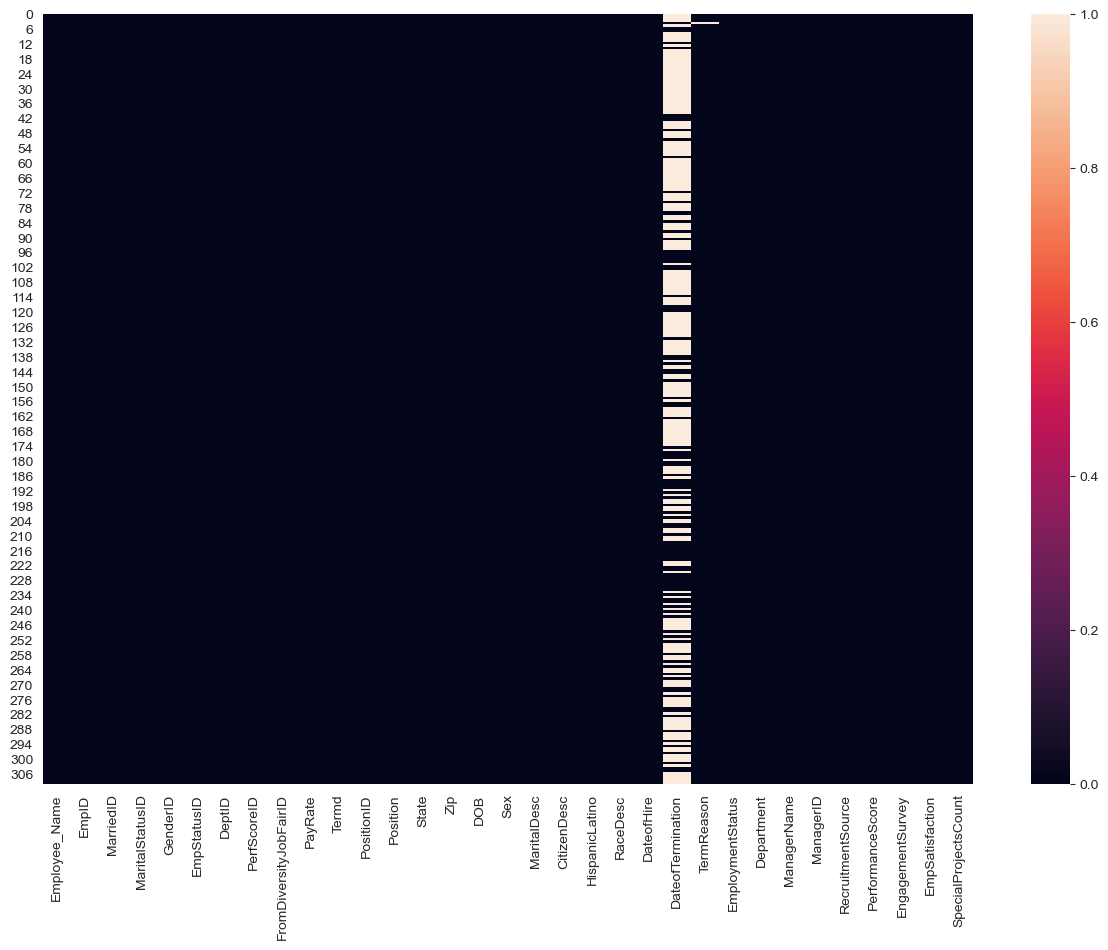

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [45]:
df['Manager_Label'] = df['ManagerName'] + " (" + df['ManagerID'].astype(int).astype(str) + ")"

In [53]:
unique_scores = df['PerformanceScore'].unique()
unique_scores

array(['Fully Meets', 'PIP', 'Exceeds', 'Needs Improvement'], dtype=object)

In [55]:
score_mapping = {
    "PIP": 1,
    "Needs Improvement": 2,
    "Fully Meets": 3,
    "Exceeds": 4
}

df['PerformanceScoreNumeric'] = df['PerformanceScore'].map(score_mapping)

df.head(15)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Manager_Label,PerformanceScoreNumeric
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,Brandon R. LeBlanc (1),3
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,Brandon R. LeBlanc (1),3
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,Brandon R. LeBlanc (1),3
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,Brandon R. LeBlanc (1),3
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,Brandon R. LeBlanc (1),3
5,"Smith, Leigh Ann",7.110077e+08,1.0,1.0,0.0,5.0,1.0,3.0,1.0,20.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,3.80,4.0,4.0,Brandon R. LeBlanc (1),3
6,"Bunbury, Jessica",1.504073e+09,1.0,1.0,0.0,5.0,6.0,3.0,0.0,55.00,...,Sales,John Smith,17.0,Social Networks - Facebook Twitter etc,Fully Meets,3.14,5.0,0.0,John Smith (17),3
7,"Carter, Michelle",1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,...,Sales,John Smith,17.0,Billboard,Fully Meets,5.00,5.0,0.0,John Smith (17),3
8,"Dietrich, Jenna",1.408069e+09,0.0,0.0,0.0,1.0,6.0,1.0,0.0,55.00,...,Sales,John Smith,17.0,Website Banner Ads,PIP,2.30,1.0,0.0,John Smith (17),1
9,"Digitale, Alfred",1.306059e+09,1.0,1.0,1.0,1.0,6.0,3.0,0.0,56.00,...,Sales,John Smith,17.0,Pay Per Click - Google,Fully Meets,3.60,5.0,0.0,John Smith (17),3


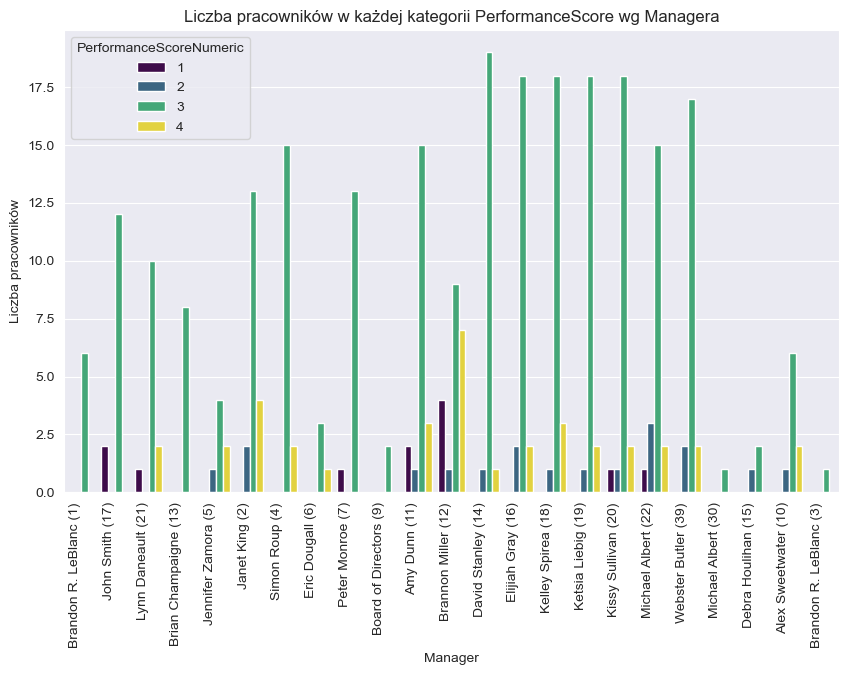

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Manager_Label', hue='PerformanceScoreNumeric', data=df, palette='viridis')
plt.title('Liczba pracowników w każdej kategorii PerformanceScore wg Managera')
plt.xlabel('Manager')
plt.xticks(rotation=90, ha="right")
plt.ylabel('Liczba pracowników')
plt.legend(title='PerformanceScoreNumeric')
plt.show()

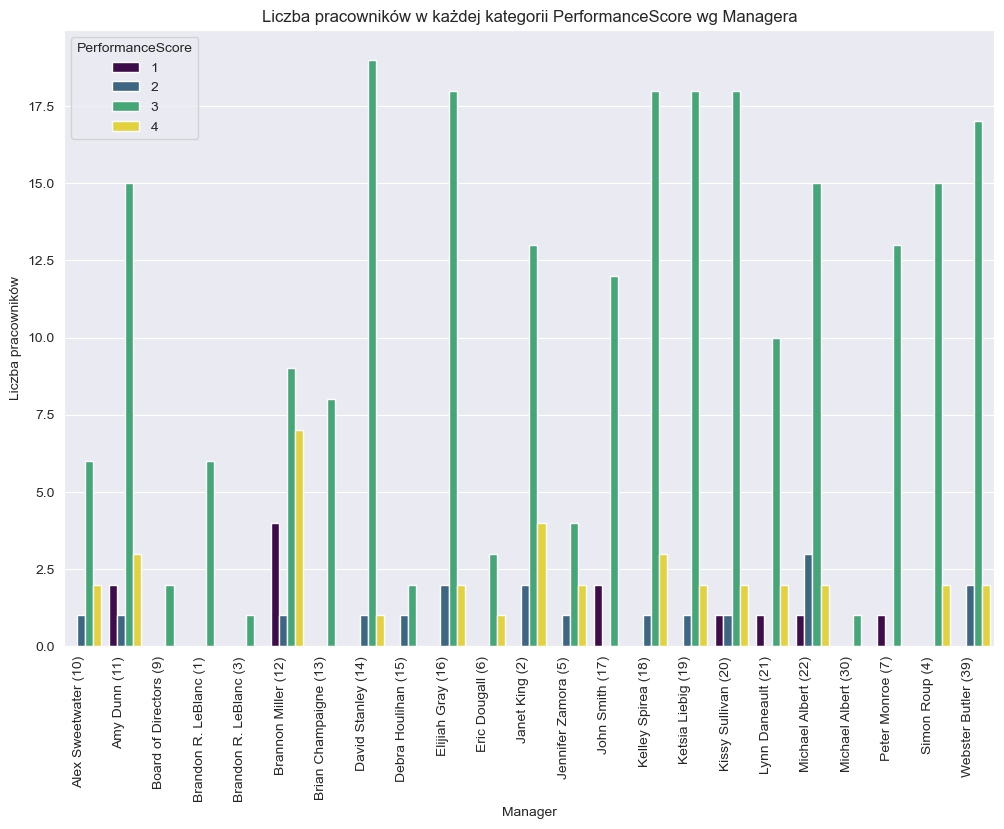

In [63]:
agg_df = df.groupby(['Manager_Label', 'PerformanceScoreNumeric']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='Manager_Label', y='Count', hue='PerformanceScoreNumeric', data=agg_df, palette='viridis')
plt.title('Liczba pracowników w każdej kategorii PerformanceScore wg Managera')
plt.xlabel('Manager')
plt.xticks(rotation=90, ha="right")
plt.ylabel('Liczba pracowników')
plt.legend(title='PerformanceScore')
plt.show()

C:\Users\Greg Z\AppData\Local\Temp\ipykernel_8804\1633382015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Manager_Label', y='PerformanceScoreNumeric', data=df, palette='viridis')


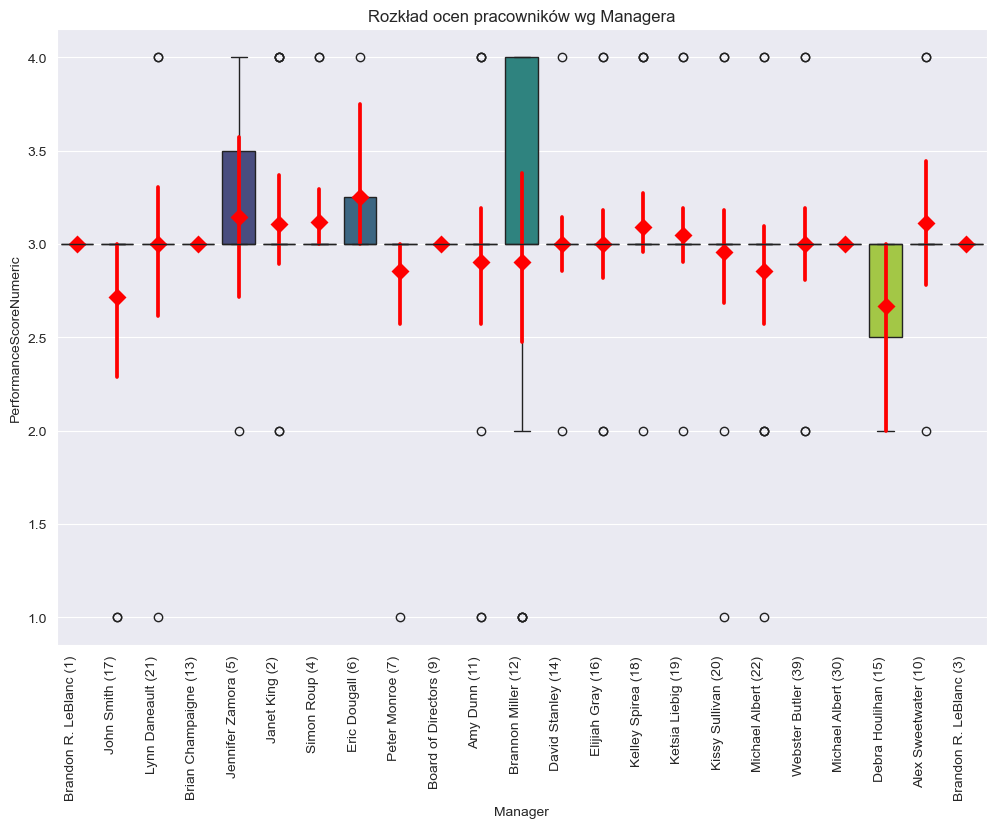

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Manager_Label', y='PerformanceScoreNumeric', data=df, palette='viridis')

sns.pointplot(x='Manager_Label', y='PerformanceScoreNumeric', data=df, estimator='mean', color='red', markers='D', linestyles='')

plt.title('Rozkład ocen pracowników wg Managera')
plt.xlabel('Manager')
plt.xticks(rotation=90, ha="right")
plt.ylabel('PerformanceScoreNumeric')
plt.show()

In [67]:
value_counts = df['PerformanceScoreNumeric'].value_counts()
value_percentages = df['PerformanceScoreNumeric'].value_counts(normalize=True) * 100
result_df = pd.DataFrame({
    'Liczba wystąpień': value_counts,
    'Procentowy udział': value_percentages
})
result_df

,Liczba wystąpień,Procentowy udział
PerformanceScoreNumeric,,
3,243,78.387097
4,37,11.935484
2,18,5.806452
1,12,3.870968


C:\Users\Greg Z\AppData\Local\Temp\ipykernel_8804\2512406146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Manager_Label', y='PerformanceScoreNumeric', data=df, palette='viridis')


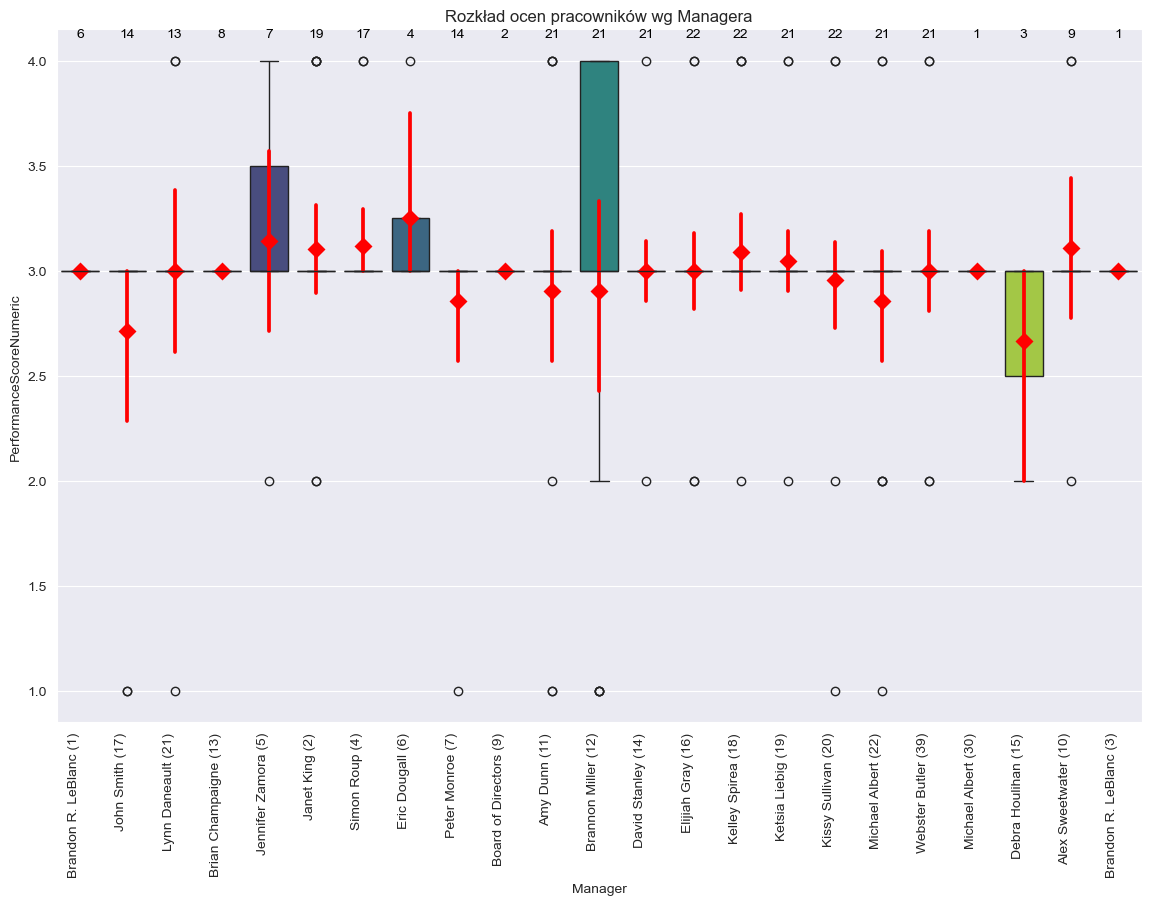

In [77]:
plt.figure(figsize=(14, 9))
ax = sns.boxplot(x='Manager_Label', y='PerformanceScoreNumeric', data=df, palette='viridis')

sns.pointplot(x='Manager_Label', y='PerformanceScoreNumeric', data=df, estimator='mean', color='red', markers='D', linestyles='', ax=ax)

manager_counts = df['Manager_Label'].value_counts()

manager_order = ax.get_xticklabels()
manager_order = [label.get_text() for label in manager_order]

for i, manager in enumerate(manager_order):
    count = manager_counts[manager]
    plt.text(i, df['PerformanceScoreNumeric'].max() + 0.1, f'{count}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Rozkład ocen pracowników wg Managera')
plt.xlabel('Manager')
plt.xticks(rotation=90, ha="right")
plt.ylabel('PerformanceScoreNumeric')
plt.show()

In [79]:
manager_counts = df['Manager_Label'].value_counts().reset_index()
manager_counts.columns = ['Manager_Label', 'Liczba pracowników']

manager_means = df.groupby('Manager_Label')['PerformanceScoreNumeric'].mean().reset_index()
manager_means.columns = ['Manager_Label', 'Średnia ocena']

result_df = pd.merge(manager_counts, manager_means, on='Manager_Label')
result_df = result_df.sort_values(by='Średnia ocena', ascending=False)
result_df

,Manager_Label,Liczba pracowników,Średnia ocena
18,Eric Dougall (6),4,3.250000
16,Jennifer Zamora (5),7,3.142857
10,Simon Roup (4),17,3.117647
14,Alex Sweetwater (10),9,3.111111
9,Janet King (2),19,3.105263
1,Kelley Spirea (18),22,3.090909
4,Ketsia Liebig (19),21,3.047619
22,Brandon R. LeBlanc (3),1,3.000000
2,Elijiah Gray (16),22,3.000000
21,Michael Albert (30),1,3.000000


In [81]:
# Baza danych jest aktualna na dzień 27 września 2019

# Wersja pod nowe Pandas (Używamy 'D' (dni) bo nie ma 'Y') i konwertujemy dni na lata (przyjmując średnio 365.25 dni w roku)

import datetime as dt

def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019, 9, 27)
    else:
        end_date = row['DateofTermination']
    
    days = (end_date - row['DateofHire'])/np.timedelta64(1, 'D')
    
    years = days / 365.25
    
    return years

In [83]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

df[['DateofHire','DateofTermination','Seniority']].head(15)

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.915811
1,2014-01-06,NaT,5.722108
2,2014-09-29,NaT,4.993840
3,2015-02-16,2015-04-15,0.158795
4,2015-05-01,NaT,4.407940
5,2011-09-26,2013-09-25,1.998631
6,2011-08-15,2014-08-02,2.965092
7,2014-08-18,NaT,5.108830
8,2012-02-20,NaT,7.600274
9,2014-08-18,NaT,5.108830


In [87]:
unique_recr_counts = df['RecruitmentSource'].value_counts()
unique_recr_counts_df = unique_recr_counts.reset_index()
unique_recr_counts_df.columns = ['RecruitmentSource', 'Count']
unique_recr_counts_df

,RecruitmentSource,Count
0,Employee Referral,31
1,Diversity Job Fair,29
2,Search Engine - Google Bing Yahoo,25
3,Monster.com,24
4,Pay Per Click - Google,21
5,Professional Society,20
6,Newspager/Magazine,18
7,MBTA ads,17
8,Billboard,16
9,Vendor Referral,15


In [93]:
avg_seniority_by_source = df.groupby('RecruitmentSource')['Seniority'].mean().reset_index()
avg_seniority_by_source = avg_seniority_by_source.sort_values(by='Seniority', ascending=False)

avg_seniority_merged_df = pd.merge(avg_seniority_by_source, unique_recr_counts_df, on='RecruitmentSource')

avg_seniority_merged_df

,RecruitmentSource,Seniority,Count
0,Careerbuilder,8.481862,1
1,Other,6.453114,9
2,Billboard,5.862765,16
3,MBTA ads,5.729516,17
4,Website Banner Ads,5.721476,13
5,Information Session,5.623546,4
6,Professional Society,5.437645,20
7,Employee Referral,5.025899,31
8,Pay Per Click - Google,5.009354,21
9,On-campus Recruiting,5.006388,12


C:\Users\Greg Z\AppData\Local\Temp\ipykernel_8804\3491515685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seniority', y='RecruitmentSource', data=df, palette='Set2')


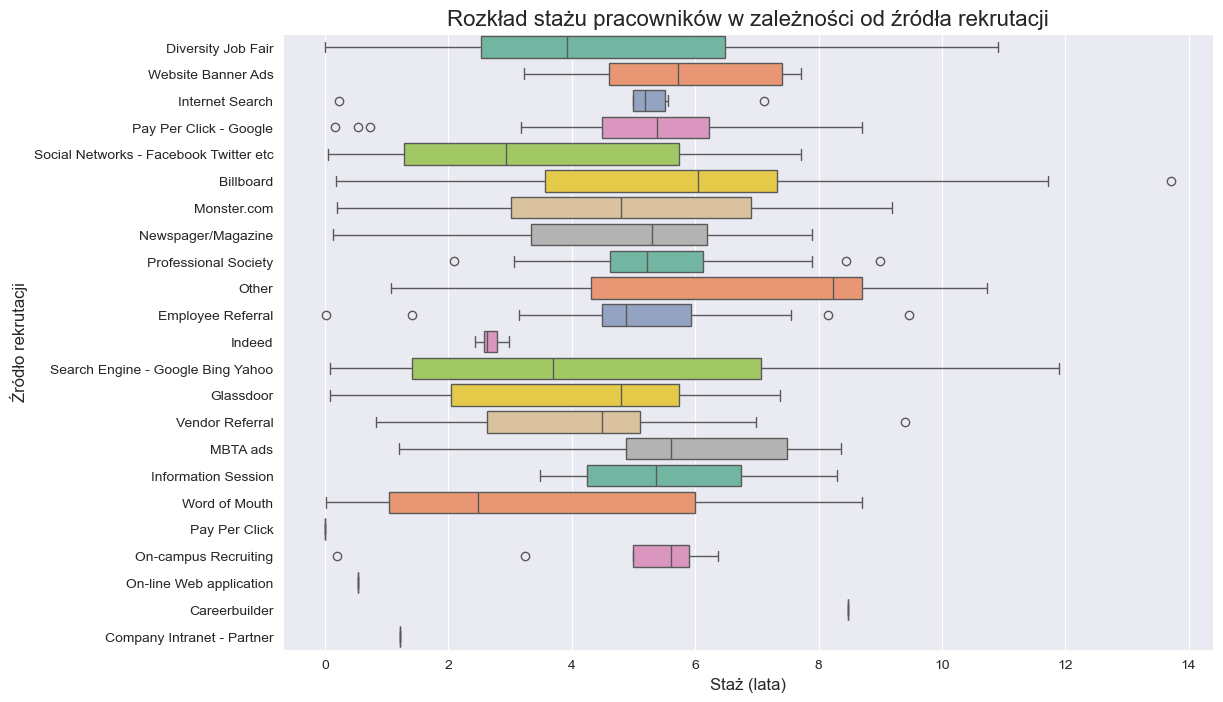

In [95]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Seniority', y='RecruitmentSource', data=df, palette='Set2')
plt.title('Rozkład stażu pracowników w zależności od źródła rekrutacji', fontsize=16)
plt.xlabel('Staż (lata)', fontsize=12)
plt.ylabel('Źródło rekrutacji', fontsize=12)
plt.show()

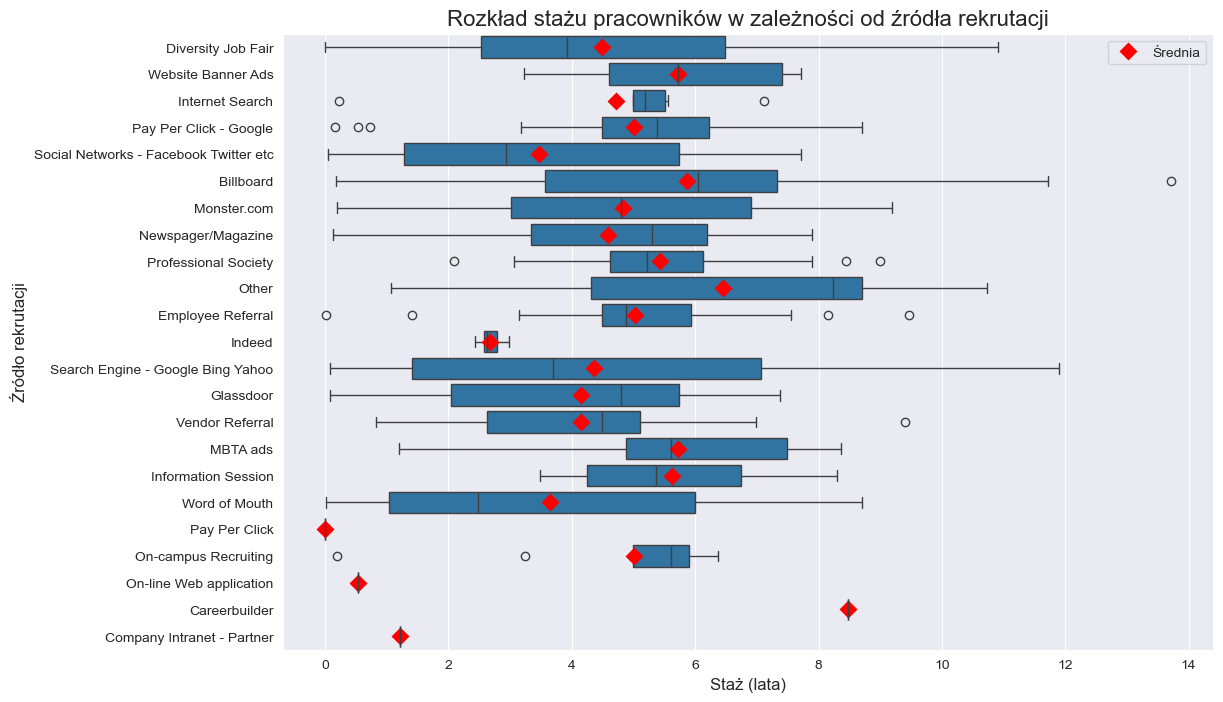

In [99]:
## To samo co wyżej plus średnie

plt.figure(figsize=(12, 8))
sns.boxplot(x='Seniority', y='RecruitmentSource', data=df)

sns.pointplot(x='Seniority', y='RecruitmentSource', data=df, estimator='mean', errorbar=None, color='red', markers='D', linestyles='', label='Średnia')

plt.title('Rozkład stażu pracowników w zależności od źródła rekrutacji', fontsize=16)
plt.xlabel('Staż (lata)', fontsize=12)
plt.ylabel('Źródło rekrutacji', fontsize=12)

plt.show()

In [111]:
# średnie zadowolenie z pracy dla każdego stanu cywilnego
avg_satisfaction_by_marital = df.groupby('MaritalDesc')['EmpSatisfaction'].mean().reset_index()
avg_satisfaction_by_marital = avg_satisfaction_by_marital.sort_values(by='EmpSatisfaction', ascending=False)
avg_satisfaction_by_marital

,MaritalDesc,EmpSatisfaction
4,Widowed,4.250000
0,Divorced,4.033333
3,Single,3.970803
2,Separated,3.833333
1,Married,3.747967


In [115]:
marital_recr_counts = df['MaritalDesc'].value_counts()
marital_recr_counts_df = marital_recr_counts.reset_index()
marital_recr_counts_df.columns = ['MaritalDesc', 'EmployeeCount']

avg_satisfaction_by_marital_counts = pd.merge(avg_satisfaction_by_marital, marital_recr_counts_df, on='MaritalDesc')
avg_satisfaction_by_marital_counts

,MaritalDesc,EmpSatisfaction,EmployeeCount
0,Widowed,4.250000,8
1,Divorced,4.033333,30
2,Single,3.970803,137
3,Separated,3.833333,12
4,Married,3.747967,123


In [121]:
from scipy.stats import f_oneway

groups = [df[df['MaritalDesc'] == category]['EmpSatisfaction'] for category in df['MaritalDesc'].unique()]

# test ANOVA
f_statistic, p_value = f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 1.5381614759868525
P-value: 0.19098788812911743


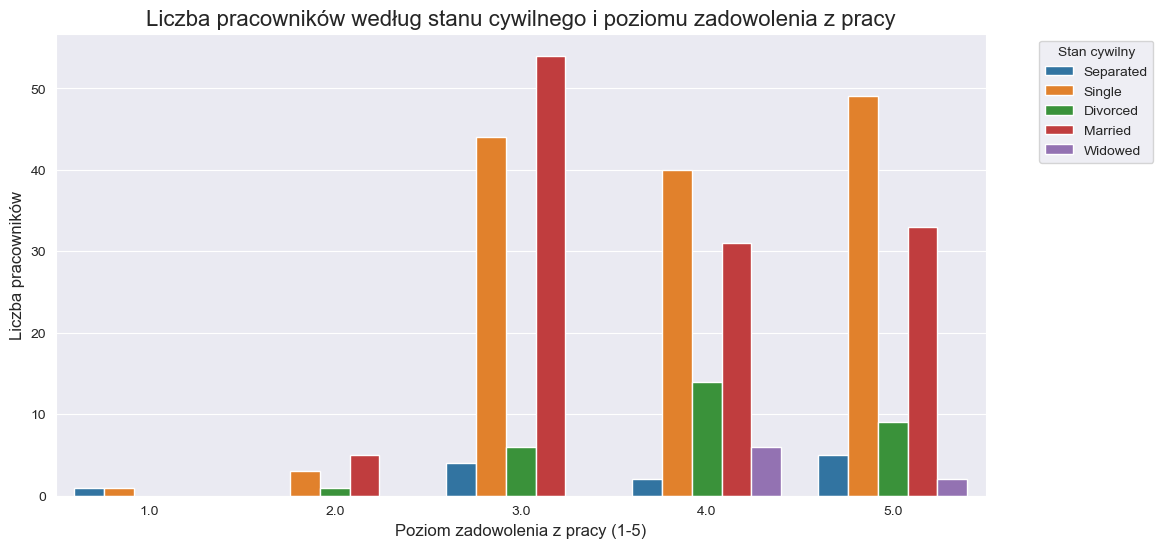

In [123]:
satisfaction_counts = df.groupby(['MaritalDesc', 'EmpSatisfaction']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='EmpSatisfaction', y='Count', hue='MaritalDesc', data=satisfaction_counts)

plt.title('Liczba pracowników według stanu cywilnego i poziomu zadowolenia z pracy', fontsize=16)
plt.xlabel('Poziom zadowolenia z pracy (1-5)', fontsize=12)
plt.ylabel('Liczba pracowników', fontsize=12)

plt.legend(title='Stan cywilny', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

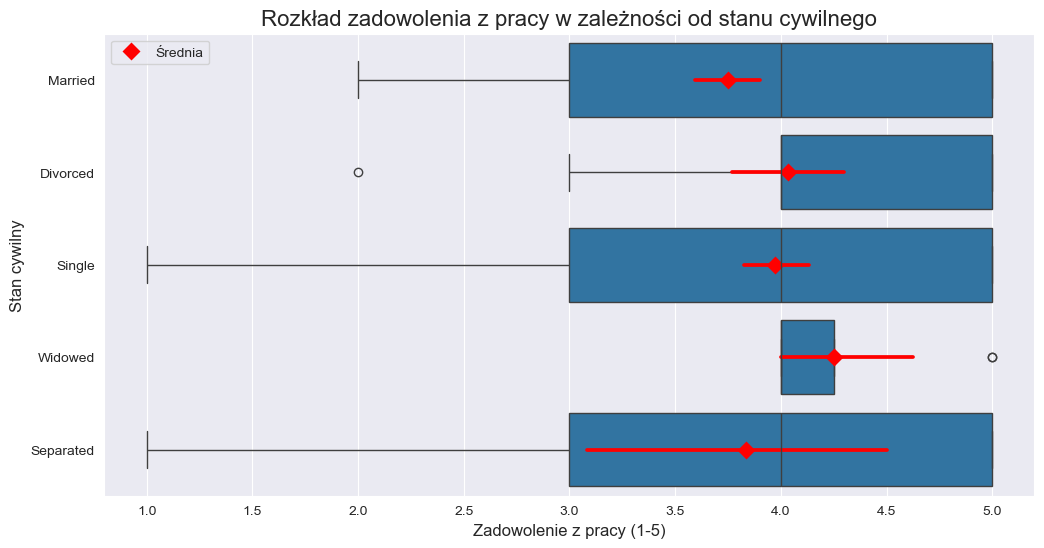

In [125]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='EmpSatisfaction', y='MaritalDesc', data=df)

sns.pointplot(x='EmpSatisfaction', y='MaritalDesc', data=df, estimator='mean', color='red', markers='D', linestyles='', label='Średnia')

plt.title('Rozkład zadowolenia z pracy w zależności od stanu cywilnego', fontsize=16)
plt.xlabel('Zadowolenie z pracy (1-5)', fontsize=12)
plt.ylabel('Stan cywilny', fontsize=12)

plt.show()